# 아이리스 품종 분류 (회귀)
[Tensorflow 101 - 14. 아이리스 품종 분류](https://www.youtube.com/watch?v=cD0Z7VeSbq8&list=PLl1irxoYh2wyLwJutUZx5Q_QEEDZoXBnz&index=14)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 모델 구조 만들기
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation='softmax')(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
#metrics='accuracy'는 정확도를 보여주기 위한 부분. 없어도 잘 돌아감.

In [3]:
# 원핫인코딩, 표에다가 맞으면 1, 틀리면 0

아이리스 = pd.read_csv('./iris.csv')
#아이리스.head() 상위 5개의 ㄱ값을 출력
#원핫인코딩
인코딩 = pd.get_dummies(아이리스)
독립 = 인코딩[['꽃잎길이', '꽃잎폭',	'꽃받침길이',	'꽃받침폭']]
종속 = 인코딩[['품종_setosa',	'품종_versicolor',	'품종_virginica']] 

In [4]:
인코딩.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [5]:
epochs = 500
history = model.fit(독립, 종속, epochs=epochs)


Epoch 299/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.9533
Epoch 300/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.9533
Epoch 301/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.9667
Epoch 302/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.9600
Epoch 303/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.9600
Epoch 304/500
5/5 [==============================] - 0s 4ms/step - loss: 0.3860 - accuracy: 0.9533
Epoch 305/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.9600
Epoch 306/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.9600
Epoch 307/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.9533
Epoch 308/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.9600
Epoch 309

In [8]:
# 가중치 보기
model.get_weights()

[array([[-0.1560034 , -0.27689365, -0.53712356],
        [ 2.4454892 ,  0.6659721 , -0.21894021],
        [-1.8110503 ,  0.42783877,  1.080322  ],
        [-1.8123174 , -0.9383951 ,  0.62547696]], dtype=float32),
 array([ 1.2965639 ,  0.42128783, -1.0773427 ], dtype=float32)]

## 히든 레이어 추가하기!!

In [37]:
# 모델 구조 만들기
X = tf.keras.layers.Input(shape=[4])
H = tf.keras.layers.Dense(8, activation='swish')(X)
Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model2 = tf.keras.models.Model(X,Y)
model2.compile(loss='categorical_crossentropy', metrics='accuracy')
#metrics='accuracy'는 정확도를 보여주기 위한 부분. 없어도 잘 돌아감.
model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [38]:
epochs = 500
history2 = model2.fit(독립, 종속, epochs=epochs)


Epoch 299/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9800
Epoch 300/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9733
Epoch 301/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9733
Epoch 302/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9733
Epoch 303/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2130 - accuracy: 0.9800
Epoch 304/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9800
Epoch 305/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9933
Epoch 306/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9800
Epoch 307/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9733
Epoch 308/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9733
Epoch 309

In [39]:
model2.get_weights()

[array([[-0.07413442,  0.08472938, -0.32690158, -0.44431493,  0.42304844,
         -0.0193764 ,  0.05774073,  1.0318683 ],
        [-0.80199575, -0.00397053,  0.02802232,  0.87299883,  0.07728488,
          0.4183696 ,  0.38867474,  0.39879817],
        [ 1.2952776 ,  0.5530841 ,  0.9356456 , -0.07757001, -0.8307248 ,
         -0.59013885, -0.6452814 , -0.39411703],
        [ 1.0747594 , -1.10771   ,  0.16948363, -1.2913616 , -0.8397225 ,
         -0.7068983 , -0.69068635, -0.648809  ]], dtype=float32),
 array([-0.34856007,  0.56863695, -0.43974698,  0.29003218,  0.1138183 ,
         0.53330886,  0.3856341 ,  0.63264275], dtype=float32),
 array([[-2.4596643 , -0.21530153,  0.9026038 ],
        [-1.3891321 ,  0.7316636 , -0.0689763 ],
        [-2.1309204 , -0.40445048,  0.7011929 ],
        [-0.51995087, -1.3939209 ,  1.2868912 ],
        [-0.01881841, -0.95447886,  1.3660136 ],
        [ 0.8073338 , -0.49332848,  2.3729913 ],
        [ 0.26349923, -1.483569  ,  1.8395224 ],
        [ 1

# 이상한 레이어 쌓기

In [40]:
# 모델 구조 만들기
X = tf.keras.layers.Input(shape=[4])

H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers. ()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(3, activation='softmax')(H)
model3 = tf.keras.models.Model(X,Y)
model3.compile(loss='categorical_crossentropy', metrics='accuracy')
#metrics='accuracy'는 정확도를 보여주기 위한 부분. 없어도 잘 돌아감.
model3.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 40        
_________________________________________________________________
batch_normalization_2 (Batch (None, 8)                 32        
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 27        
Total params: 99
Trainable params: 83
Non-trainable params: 16
_________________________________________________________________


In [41]:
epochs = 500
history3 = model2.fit(독립, 종속, epochs=epochs)

3
Epoch 299/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9800
Epoch 300/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9800
Epoch 301/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.9733
Epoch 302/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9800
Epoch 303/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.9733
Epoch 304/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9800
Epoch 305/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9800
Epoch 306/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.9800
Epoch 307/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9800
Epoch 308/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9867
Epoch 30

In [42]:
model2.get_weights()

[array([[-0.14834893,  0.14140831, -0.36959636, -0.39569792,  0.46558902,
          0.02957106,  0.10586043,  1.0626283 ],
        [-0.91366434,  0.08783741, -0.05168443,  0.94073766,  0.160221  ,
          0.49324527,  0.46473783,  0.46823332],
        [ 1.3420502 ,  0.4897515 ,  1.0123707 , -0.144047  , -0.89050555,
         -0.65152955, -0.7070174 , -0.48505512],
        [ 1.2856058 , -1.3299122 ,  0.40955296, -1.5001434 , -1.046561  ,
         -0.9225015 , -0.9067782 , -0.90387535]], dtype=float32),
 array([-0.52509856,  0.72881025, -0.5841104 ,  0.42012736,  0.2473449 ,
         0.66615766,  0.5194394 ,  0.76648265], dtype=float32),
 array([[-3.8170526 , -0.48564255,  1.1743124 ],
        [-1.4650235 ,  0.93328696, -0.27047473],
        [-3.6299152 , -0.7180652 ,  1.0159395 ],
        [ 1.4367523 , -2.0554075 ,  1.9399077 ],
        [ 2.1168249 , -1.6920302 ,  2.0916939 ],
        [ 2.869694  , -1.1638224 ,  3.0333877 ],
        [ 2.3450773 , -2.1596892 ,  2.5050886 ],
        [ 1

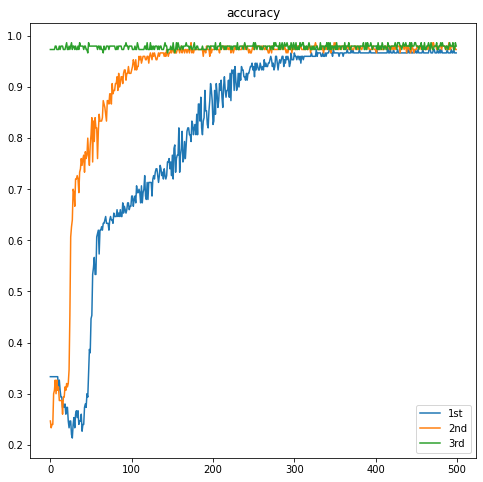

In [35]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='1st')
plt.plot(epochs_range, history2.history['accuracy'], label='2nd') # accuracy loss
plt.plot(epochs_range, history3.history['accuracy'], label='3rd') # accuracy loss
plt.legend(loc='lower right')
plt.title('accuracy')
plt.show()